# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 20
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.Adam]

In [7]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________________________

Epoch 17/20
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 18/20
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 19/20
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 20/20
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512) 

50000/50000 [==============================] - 16s 328us/step - loss: 1.2205 - accuracy: 0.5664 - val_loss: 1.3509 - val_accuracy: 0.5186
Epoch 17/20
50000/50000 [==============================] - 17s 333us/step - loss: 1.2009 - accuracy: 0.5712 - val_loss: 1.3601 - val_accuracy: 0.5219
Epoch 18/20
50000/50000 [==============================] - 16s 318us/step - loss: 1.1771 - accuracy: 0.5817 - val_loss: 1.3618 - val_accuracy: 0.5183
Epoch 19/20
50000/50000 [==============================] - 15s 307us/step - loss: 1.1542 - accuracy: 0.5881 - val_loss: 1.3605 - val_accuracy: 0.5171
Epoch 20/20
50000/50000 [==============================] - 15s 306us/step - loss: 1.1359 - accuracy: 0.5935 - val_loss: 1.3252 - val_accuracy: 0.5371
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 307

50000/50000 [==============================] - 16s 313us/step - loss: 1.5959 - accuracy: 0.4471 - val_loss: 1.6050 - val_accuracy: 0.4415
Epoch 16/20
50000/50000 [==============================] - 15s 309us/step - loss: 1.5841 - accuracy: 0.4520 - val_loss: 1.5993 - val_accuracy: 0.4405
Epoch 17/20
50000/50000 [==============================] - 15s 305us/step - loss: 1.5725 - accuracy: 0.4549 - val_loss: 1.5857 - val_accuracy: 0.4454
Epoch 18/20
50000/50000 [==============================] - 15s 301us/step - loss: 1.5625 - accuracy: 0.4587 - val_loss: 1.5799 - val_accuracy: 0.4486
Epoch 19/20
50000/50000 [==============================] - 15s 306us/step - loss: 1.5529 - accuracy: 0.4597 - val_loss: 1.5708 - val_accuracy: 0.4522
Epoch 20/20
50000/50000 [==============================] - 15s 301us/step - loss: 1.5442 - accuracy: 0.4634 - val_loss: 1.5601 - val_accuracy: 0.4537


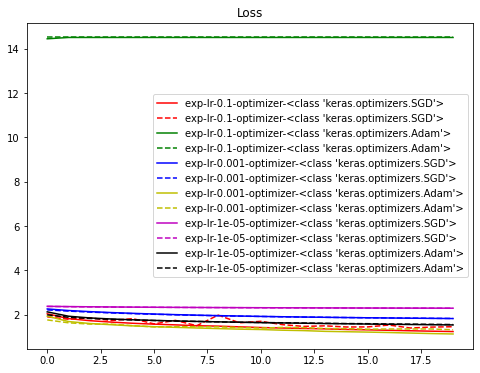

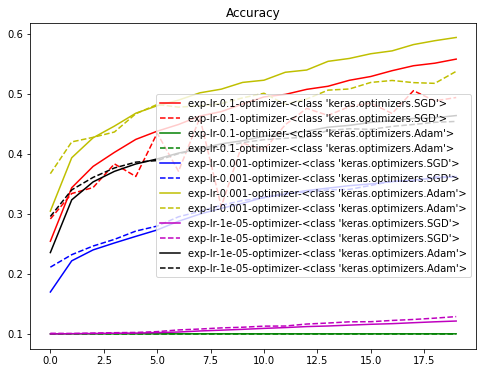

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()